## Hoja de Trabajo 2 - Modelación y Simulación

Stefano Aragoni, Carol Arévalo

------------

## Ejercicio 2 - Preguntas Prácticas

### Ejercicio 2.1

Usted es el gerente de una fábrica que produce dos tipos de productos: A y B. La fábrica tiene recursos limitados,
incluidas las horas de trabajo y las materias primas. Su objetivo es maximizar las ganancias mientras satisface la
demanda de ambos productos.


Para eso usted recolecta los siguientes datos:
- El producto A requiere 2 horas de mano de obra y 3 unidades de materia prima por unidad.
- El producto B requiere 4 horas de mano de obra y 2 unidades de materia prima por unidad.
- Tiene un total de 100 horas de mano de obra y 120 unidades de materia prima disponibles.
- La ganancia del producto A es de $10 por unidad y la del producto B es de $15 por unidad.

Usted sabe que la función que desea maximizar es la de la ganancia (10x+15y, donde x=producto A, y = producto B)

Responda:

1. **Escriba la fórmula de cada una de las restricciones, recuerde incluir la restricción de no-negatividad**

Según el enunciado, las restricciones son:
- La fábrica tiene recursos limitados, incluidas las horas de mano de obra y las materias primas.
- Restricción de no-negatividad

Por tal razón, las fórmulas de las restricciones son:

$$ Restricción Mano de Obra: 2x+4y≤100 $$

$$ Restricción Materia Prima: 3x+2y≤120 $$

$$ Restricción No Negatividad: x≥0, y≥0 $$


2. **Usando programación lineal, determine cuántas unidades de cada producto se deben producir para maximizar la ganancia y cumplir con las restricciones de recursos.**
- Escriba un script en Python o en otro lenguaje de programación de su preferencia

Referencia:
- https://towardsdatascience.com/basic-linear-programming-in-python-with-pulp-d398d144802b

In [2]:
from pulp import *
pulp.LpSolverDefault.msg = 0

# Crear el problema
prob = LpProblem("HDT2-2.1", LpMaximize)

# Variables de decisión
x = LpVariable("x", 0, cat="Integer")  # Cantidad de producto A         Se agrega Integer para que sea entera la solución
y = LpVariable("y", 0, cat="Integer")  # Cantidad de producto B         Se agrega Integer para que sea entera la solución

# Función objetivo
prob += 10*x + 15*y, "Ganancia"

# Restricciones
prob += 2*x + 4*y <= 100, "Restricción Mano de Obra"
prob += 3*x + 2*y <= 120, "Restricción Materiales"
prob += x >= 0,           "Restricción No Negatividad A"
prob += y >= 0,           "Restricción No Negatividad B"

# Resolver el problema
prob.solve()

# Imprimir los resultados
print("Cantidad de producto A a producir:", value(x))
print("Cantidad de producto B a producir:", value(y))
print("Ganancia máxima:", value(prob.objective))


Cantidad de producto A a producir: 34.0
Cantidad de producto B a producir: 8.0
Ganancia máxima: 460.0


3. **Interprete el resultado**

En este caso, se tiene un total de 100 horas de mano de obra y 120 unidades de materia prima disponibles. Para poder maximizar la ganancia del producto A ($10 por unidad) y del producto B ($15 por unidad), se deben de producir 34 unidades del Producto A y 8 unidades del Producto B. 

Esto considerando que el producto A requiere 2 horas de mano de obra y 3 unidades de materia prima por unidad, mientras que el producto B requiere 4 horas de mano de obra y 2 unidades de materia prima por unidad.

Estos resultados indican que es más eficiente producir una mayor cantidad de productos A que de productos B, ya que el producto A genera una mayor ganancia por unidad. Sin embargo, se debe de producir ciertos productos B para poder maximizar la ganancia total.

Finalmente, es importante mencionar que estos valores se alinean con las restricciones del problema, por lo cual es una solución válida y óptima.

4. **Muestre una gráfica del feasible area mostrando el punto donde está su respuesta**

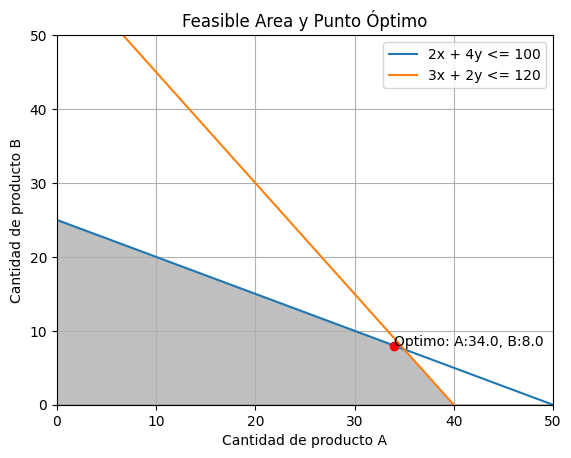

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Restricciones 
x_values = np.linspace(0, 100, 100)
y_labor = (100 - 2*x_values) / 4
y_material = (120 - 3*x_values) / 2

# Graficar las restricciones
plt.plot(x_values, y_labor, label='2x + 4y <= 100')
plt.plot(x_values, y_material, label='3x + 2y <= 120')

# Punto de optimización
plt.plot(value(x), value(y), 'ro')
plt.annotate(f'Optimo: A:{value(x)}, B:{value(y)}', (value(x), value(y)))

# Etiquetas y leyenda
plt.xlabel('Cantidad de producto A')
plt.ylabel('Cantidad de producto B')
plt.title('Feasible Area y Punto Óptimo')
plt.legend()

# Limites de los ejes
plt.xlim(0, 50)
plt.ylim(0, 50)

# Pintar feasible area
x_feasible = np.linspace(0, 100, 100)
y_feasible = np.minimum(y_labor, y_material)
plt.fill_between(x_feasible, y_feasible, color='grey', alpha=0.5)

# Mostrar la gráfica
plt.grid()
plt.show()


### Ejercicio 2.2

Está administrando la asignación de recursos en un proyecto que involucra tres tareas: Tarea A, Tarea B y Tarea C.
Cada tarea requiere una cantidad diferente de tiempo y personal para completarse. Su objetivo es asignar recursos
a estas tareas de una manera que maximice la ganancia total y satisfaga las restricciones del proyecto. Usted sabe
lo siguiente

- Tarea A:
    - Requiere 2 horas de trabajo y 1 personal
    - Produce una ganancia de $ 1500 al finalizar
- Tarea B:
    - Requiere 3 horas de trabajo y 2 personas
    - Produce una ganancia de $ 2500 al finalizar
- Tarea C:
    - Requiere 5 horas de trabajo y 3 personas
    - Produce una ganancia de $ 4000 al finalizar
    
Tiene un total de 15 horas de trabajo y 10 personas disponibles. Formule esto como un problema de programación
lineal para maximizar la ganancia total respetando las restricciones de recursos. Resuelva el problema y determine
la asignación óptima de recursos para cada tarea. Escriba un script en Python o en otro lenguaje de programación
de su preferencia y responda

1. **Escriba la fórmula de la función que debe maximizar**

$$ Ganancia = 1500x + 2500y + 4000z $$

Donde x = Cantidad de recursos asignados a la Tarea A, y = Cantidad de recursos asignados a la Tarea B, z = Cantidad de recursos asignados a la Tarea C.

2. **Escriba la fórmula de cada una de las restricciones, recuerde incluir la restricción de no-negatividad**

Según el enunciado, las restricciones son:
- La fábrica tiene recursos limitados, incluidas las horas de trabajo y las personas.
- Restricción de no-negatividad

Por tal razón, las fórmulas de las restricciones son:

$$ HorasTrabajo: 2x + 3y + 5z ≤ 15 $$

$$ Personas: 1x + 2y + 3z ≤ 10 $$

$$ Restricción No Negatividad: x≥0, y≥0, z≥0 $$


3. **Determine las cantidades de asignación óptima. Interprete el resultado**

In [4]:
pulp.LpSolverDefault.msg = 0

# Crear el problema
prob = LpProblem("HDT2-2.2", LpMaximize)

# Variables de decisión
x = LpVariable("x", 0, cat="Integer")   # Cantidad de recursos a Tarea A         Se agrega Integer para que sea entera la solución
y = LpVariable("y", 0, cat="Integer")   # Cantidad de recursos a Tarea B         Se agrega Integer para que sea entera la solución
z = LpVariable("z", 0, cat="Integer")   # Cantidad de recursos a Tarea C         Se agrega Integer para que sea entera la solución

# Función objetivo
prob += 1500*x + 2500*y + 4000*z, "Ganancia"

# Restricciones
prob += 2*x + 3*y + 5*z <= 15, "Horas Trabajo Restricción"
prob += 1*x + 2*y + 3*z <= 10, "Personas Restricción"
prob += x >= 0,           "Restricción No Negatividad A"
prob += y >= 0,           "Restricción No Negatividad B"
prob += z >= 0,           "Restricción No Negatividad C"

# Resolver el problema
prob.solve()

# Imprimir los resultados
print("Asignación óptima para Tarea A:", value(x))
print("Asignación óptima para Tarea B:", value(y))
print("Asignación óptima para Tarea C:", value(z))
print("Ganancia máxima:", value(prob.objective))

Asignación óptima para Tarea A: 0.0
Asignación óptima para Tarea B: 5.0
Asignación óptima para Tarea C: 0.0
Ganancia máxima: 12500.0


En este caso, se tiene un total de 15 horas de trabajo y 10 personas disponibles. Para poder maximizar la ganancia total, respetando las restricciones de recursos, se debe de de darle todos los recursos a la Tarea B. Esto resulta en que se completen 5 veces la tarea B, y 0 veces la tarea A y C. 

En este caso, B es la única tarea cuyas restricciones son valores que dividen a 15 y 10, respectivamente. Por lo tanto, es la única tarea que puede ser completada un número entero de veces. Asimismo, presenta la mayor ganancia por recurso utilizado, por lo que es la que más conviene realizar. 

Ya que esta tarea presenta la mayor ganancia por recurso utilizado, y es la única que puede ser completada un número entero de veces, es la única que se debe de realizar. No hay necesidad de realizar otras tareas ya que no se puede obtener una ganancia mayor, y tampoco hay espacio para realizar otras tareas.

4. **¿Podría dibujar la feasible region? De ser sí, ¿Cómo? De ser no, ¿por qué?**


En la investigación realizada en la primera parte, se encontró que como máximo, una gráfica de feasible region debe de tener como máximo 3 ejes. Sin embargo, tener 3 ejes podía complicar la visualización de la respectiva región. Por tal razón, en teoría sí se puede realizar un gráfico de este tipo, pero no es muy conveniente.

En base a esto, se le consolutó a ChatGPT lo siguiente para confirmar si sí era posible y cómo se podría realizar:

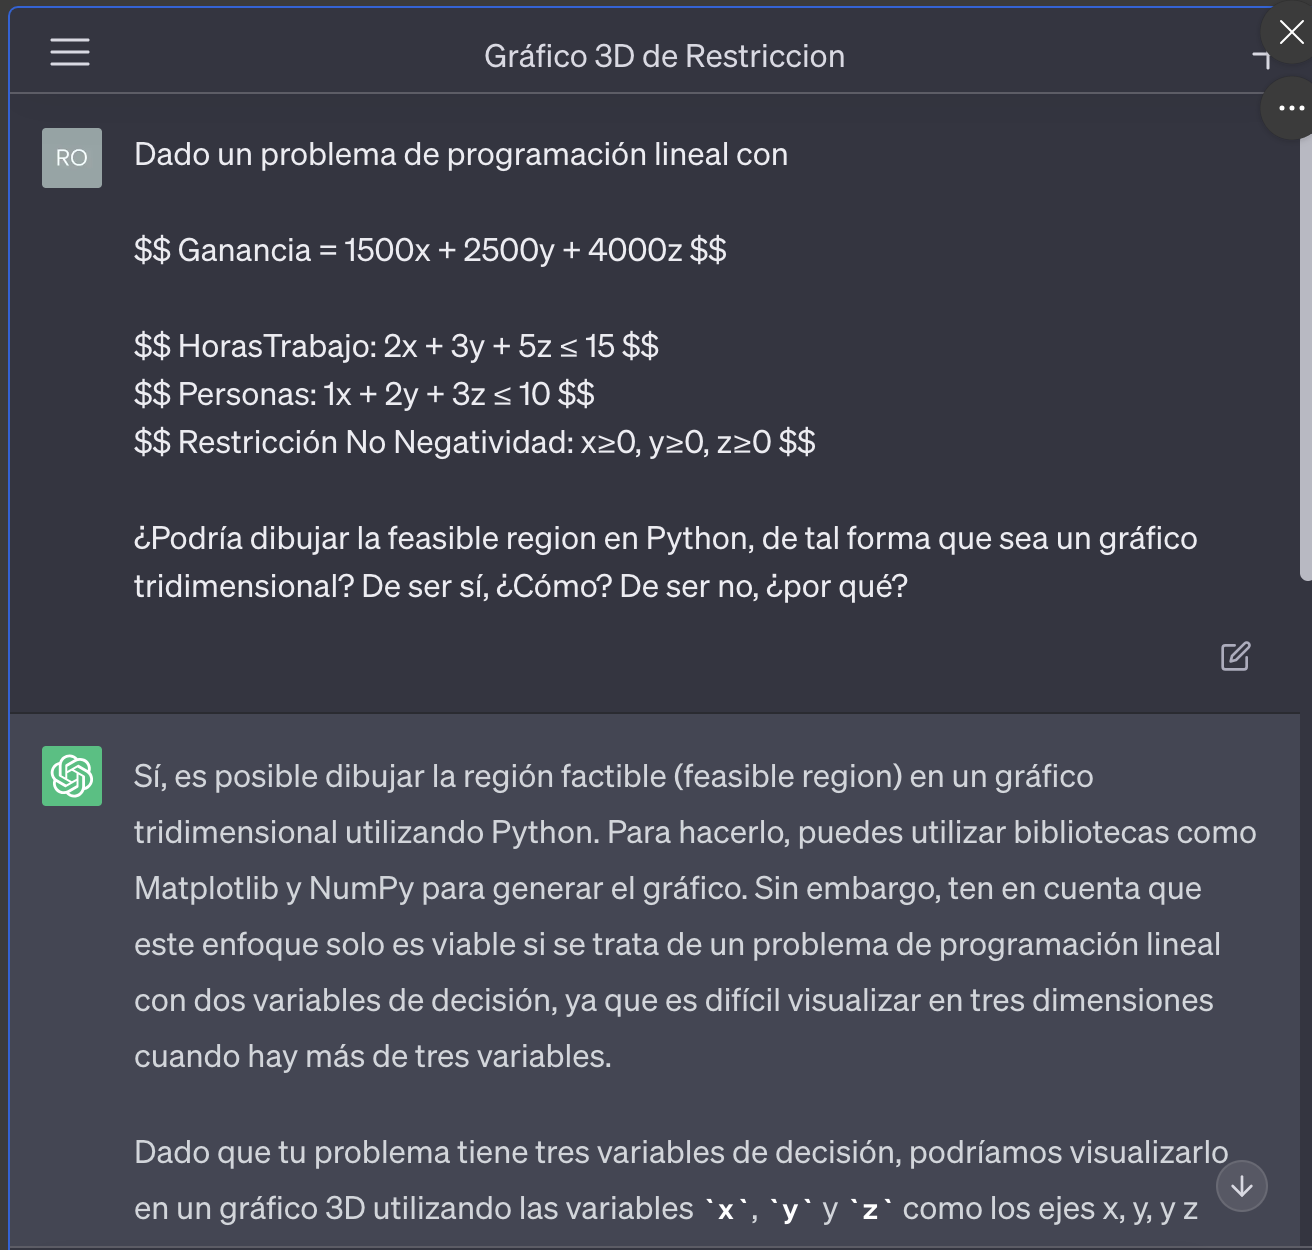

In [5]:
#python show image in jupyter notebook
from IPython.display import Image
Image(filename='chatgpt_2.2.4.png', width=400)


-> Unicamente se utilizó un prompt para obtener la respuesta. En este caso, el prompt fue claro y tenía la información del problema de programación lineal. De esta forma, el modelo pudo generar una respuesta coherente que no necesitó mayor aclaración. 

Como se puede observar, ChatGPT confirmó que sí era posible. Sin embargo, nuevamente, indicó que "a medida que agregas más dimensiones, la capacidad humana para interpretar y comprender la representación gráfica se deteriora rápidamente". Como resultado, sí se puede representar el feasible region del problema en 3D, pero es difícil de interpretar.


A continuación se muestra el código utilizado para generar la representación gráfica en 3D, creado por ChatGPT:

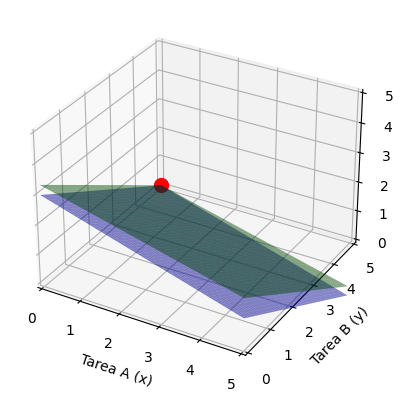

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Crear una figura tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Definir límites de los ejes
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_zlim(0, 5)

# Etiquetas de los ejes
ax.set_xlabel('Tarea A (x)')
ax.set_ylabel('Tarea B (y)')
ax.set_zlabel('Tarea C (z)')

# Crear una cuadrícula de valores para x, y, z
x_range = np.linspace(0, 5, 100)
y_range = np.linspace(0, 5, 100)
x, y = np.meshgrid(x_range, y_range)

# Calcular restricciones
z_constraint_hours = (15 - 2 * x - 3 * y) / 5
z_constraint_people = (10 - x - 2 * y) / 3

# Graficar las restricciones
ax.plot_surface(x, y, z_constraint_hours, color='blue', alpha=0.5)
ax.plot_surface(x, y, z_constraint_people, color='green', alpha=0.5)

# Graficar punto óptimo
ax.scatter(0, 5, 0, color='red', s=100)

# Mostrar el gráfico
plt.show()


### Ejercicio 2.3

Usted es gerente de producción en una empresa que fabrica tres tipos de productos: Producto A, Producto B y Producto C. Cada producto requiere diferentes cantidades de materias primas, mano de obra y tiempo de máquina para producir. Tiene recursos limitados para materias primas, mano de obra y tiempo de máquina, y desea optimizar la combinación de producción para maximizar las ganancias de su empresa. Usted sabe lo siguiente:


- Producto A:
    - Requiere 2 unidades de materias primas, 3 horas de mano de obra y 4 horas de tiempo de máquina
    - Se vende a $300 por unidad
    - Cada unidad tiene un costo de $100
- Producto B:
    - Requiere 1 unidad de materia prima, 2 horas de mano de obra y 3 horas de tiempo de máquina
    - Se vende a $ 500 por unidad
    - Cada unidad tiene un costo de $200
- Producto C:
    - Requiere 3 unidades de materias primas, 4 horas de mano de obra y 2 horas de tiempo de máquina
    - Se vende a $700 por unidad
    - Cada unidad tiene un costo de $200
    
Usted tiene 100 unidades de materias primas, 120 horas de mano de obra y 150 horas de tiempo de máquina disponibles. Formule esto como un problema de programación lineal y resuélvalo para encontrar las cantidades de producción óptimas para obtener el máximo beneficio. 

1. **Escriba la fórmula de la función que debe maximizar**

$$ Beneficio = 300x + 500y + 700z - (100x + 200y + 200z) $$

Al simplificar obtenemos 

$$ Beneficio = 200x + 300y +500z $$

Donde x = cantidad producidida del Producto A, y = cantidad producida del producto B, z = Cantidad producida del Producto C.

300x, 500y y 700z son los ingresos generados de la venta de cada producto
100x, 200y y 200z son los costos de produccion de cada prodcuto por lo que se restan. 

2. **Escriba la fórmula de cada una de las restricciones, recuerde incluir la restricción de no-negatividad**

Según el enunciado, las restricciones son:
- Restricción de materia prima
- Restricción de mano de obra
- Restricción de tiempo de máquina
- Restricción de no-negatividad

Por tal razón, las fórmulas de las restricciones son:

$$ MateriasPrima: 2x + y + 3z ≤ 100 $$

$$ ManoObra: 3x + 2y + 4z ≤ 120 $$

$$ TiempoMáquina:  4x + 3y + 2z ≤ 150 $$

$$ Restricción No Negatividad: x≥0, y≥0, z≥0 $$

3. **Determine las cantidades de producción óptimas y el máximo beneficio. Interprete el resultado**

In [7]:
pulp.LpSolverDefault.msg = 0

prob = LpProblem("ProduccionOptima", LpMaximize)


x = LpVariable("Producto_A", 0, cat="Integer")
y = LpVariable("Producto_B", 0, cat="Integer")
z = LpVariable("Producto_C", 0, cat="Integer")

# Función objetivo
prob += 200 * x + 300 * y + 500 * z, "Beneficio"

# Restricciones
prob += 2 * x + y + 3 * z <= 100, "Materias Primas"
prob += 3 * x + 2 * y + 4 * z <= 120, "Mano de Obra"
prob += 4 * x + 3 * y + 2 * z <= 150, "Tiempo de Maquina"

# Restricciones de no negatividad
prob += x >= 0, "No Negatividad Producto A"
prob += y >= 0, "No Negatividad Producto B"
prob += z >= 0, "No Negatividad Producto C"

prob.solve()

print("Cantidad óptima de Producto A:", value(x))
print("Cantidad óptima de Producto B:", value(y))
print("Cantidad óptima de Producto C:", value(z))
print("Beneficio máximo:", value(prob.objective))


Cantidad óptima de Producto A: 0.0
Cantidad óptima de Producto B: 44.0
Cantidad óptima de Producto C: 8.0
Beneficio máximo: 17200.0


Inrepretacion del resultado:

Para maximizar el beneficio en una empresa que fabrica tres productos (A, B y C) con recursos limitados, la solución óptima es:

- No producir el Producto A.
- Producir 44 unidades del Producto B.
- Producir 8 unidades del Producto C.

Esto resulta en un beneficio máximo de $17,200. La estrategia se centra en aprovechar los altos márgenes de beneficio del Producto B y C, mientras se evita la producción del Producto A debido a sus mayores costos y menor margen.
